In [1]:
%matplotlib widget
import numpy as np
from astropy import units as u, constants as c
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import matplotlib
from astropy.convolution import convolve, Gaussian2DKernel
from scipy.optimize import fsolve, fmin
from astropy.io import fits
import scipy.interpolate as interp

In [6]:
map = fits.open('lya_map_240623.fits')[0].data
bvec = np.arange(10, 250, 5)
line, lwave = 'Lya', 1215.67
stack_wave = np.arange(1150, 1750, 0.2)

vscale = 3e5 * (stack_wave - lwave) / lwave
vcut = (vscale > -1000) & (vscale < 1000)

vs = vscale[vcut]

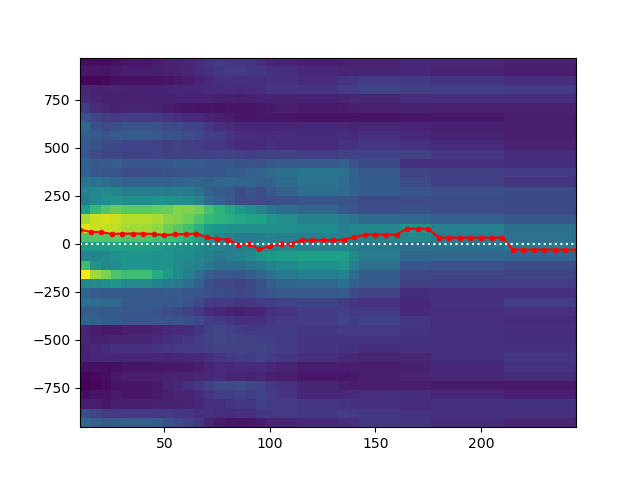

In [19]:
fig, ax = plt.subplots()
ax.imshow(map, origin='lower', aspect='auto', extent = [bvec.min(), bvec.max(), vs.min(), vs.max()])


vcents = []

for bi, b in enumerate(bvec):
    # if bi == 10:
    # vel centroids
    spec = map[:,bi]
    velcent = np.trapz(vs * spec, x=vs)/np.trapz(spec, x=vs)
    vcents.append(velcent)

ax.plot(bvec, vcents, 'r.-')
ax.axhline(0, c='white', ls = ':')


# Fold Ly$\alpha$ at halfway point

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3434424/2430204777.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$v_\mathrm{LOS}$')
/tmp/ipykernel_3434424/2430204777.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$v_\mathrm{LOS}$')


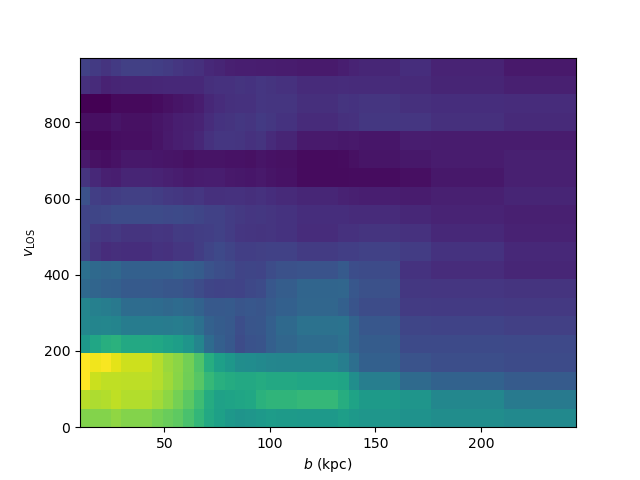

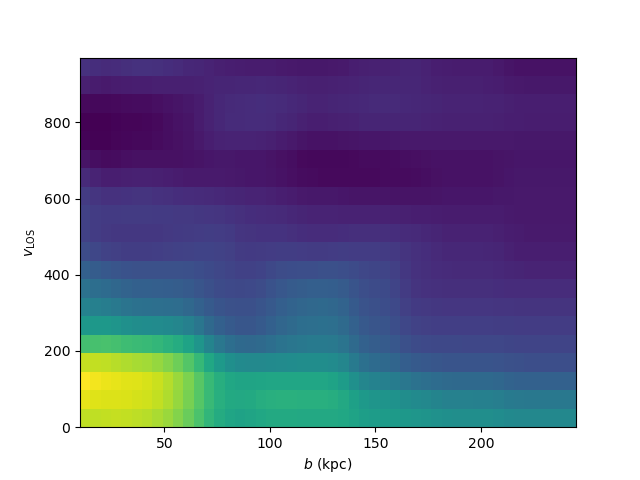

In [58]:


fig, ax = plt.subplots()

foldpt = int(map.shape[0]/2)

bottomhalf = np.flip(map[0:foldpt,:], axis=0)
tophalf = map[foldpt:,:]

comb = np.nansum([bottomhalf,tophalf], axis=0)


ax.imshow(comb, origin='lower', aspect='auto', extent = [bvec.min(), bvec.max(), 0, vs.max()])
ax.set_ylabel('$v_\mathrm{LOS}$')
ax.set_xlabel('$b$ (kpc)')
plt.show()

fig, ax = plt.subplots()
ax.imshow(convolve(comb, Gaussian2DKernel(1,1), boundary='extend'), origin='lower', aspect='auto', extent = [bvec.min(), bvec.max(), 0, vs.max()])
ax.set_ylabel('$v_\mathrm{LOS}$')
ax.set_xlabel('$b$ (kpc)')
plt.show()


# vcents = []

# for bi, b in enumerate(bvec):
#     # if bi == 10:
#     # vel centroids
#     spec = map[:,bi]
#     velcent = np.trapz(vs * spec, x=vs)/np.trapz(spec, x=vs)
#     vcents.append(velcent)

# ax.plot(bvec, vcents, 'r.-')
# ax.axhline(0, c='white', ls = ':')


# Fold Ly$\alpha$ at centroid

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_3434424/137379244.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$v_\mathrm{LOS}$')
/tmp/ipykernel_3434424/137379244.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$v_\mathrm{LOS}$')


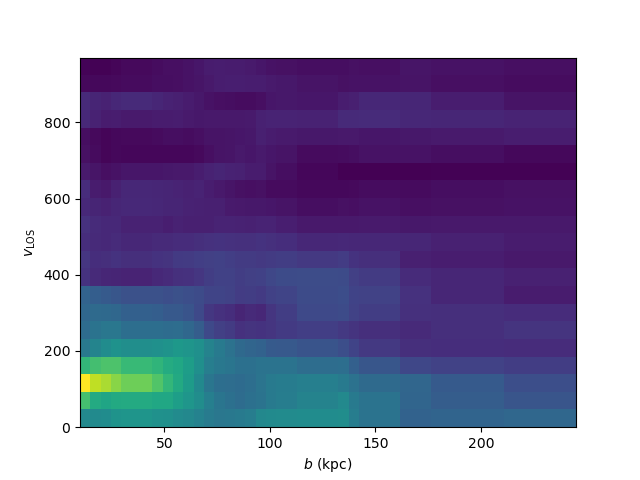

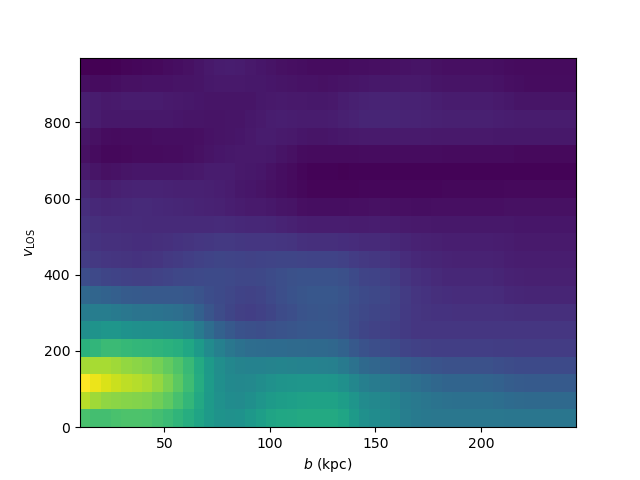

In [59]:




foldpt = int(map.shape[0]/2)

for bi, b in enumerate(bvec):
    spec = map[:,bi]
    foldpt = np.argmin(np.abs(vcents[bi] - vs))
    # print(foldpt)
    if foldpt > 20: # bottom has more pix
        bottomhalf = np.flip(map[0:foldpt,:], axis=0)
        tophalf = np.zeros_like(bottomhalf)
        for ri, r in enumerate(map[foldpt:, :]):
            tophalf[ri,:] += r
    else: # top has more pixels
        tophalf = map[foldpt:, :]
        bottomhalf = np.zeros_like(tophalf)
        bottomhalf_orig = np.flip(map[0:foldpt,:], axis=0)

        for ri, r in enumerate(bottomhalf_orig):
            bottomhalf[ri,:] += r

comb = np.nansum([bottomhalf,tophalf], axis=0)
        # plt.figure()
        # plt.imshow(bottomhalf, origin='lower')
        # plt.show()
        
        #map[foldpt:,:]
    # if bi == 10:
    # vel centroids
    

fig, ax = plt.subplots()
ax.imshow(comb, origin='lower', aspect='auto', extent = [bvec.min(), bvec.max(), 0, vs.max()])
ax.set_ylabel('$v_\mathrm{LOS}$')
ax.set_xlabel('$b$ (kpc)')
plt.show()

fig, ax = plt.subplots()
ax.imshow(convolve(comb, Gaussian2DKernel(1,1), boundary='extend'), origin='lower', aspect='auto', extent = [bvec.min(), bvec.max(), 0, vs.max()])
ax.set_ylabel('$v_\mathrm{LOS}$')
ax.set_xlabel('$b$ (kpc)')
plt.show()


# vcents = []

# for bi, b in enumerate(bvec):
#     # if bi == 10:
#     # vel centroids
#     spec = map[:,bi]
#     velcent = np.trapz(vs * spec, x=vs)/np.trapz(spec, x=vs)
#     vcents.append(velcent)

# ax.plot(bvec, vcents, 'r.-')
# ax.axhline(0, c='white', ls = ':')
